# MEGET simpel eksempel på Covariance estimaters effekt på Kalman Filteret
Kombinationer:
$$ \alpha_{C_u} = 0.01 \quad \alpha_{C_w} = 10 \lor 20 \qquad \Rightarrow \qquad \text{smoothing}$$
$$ \alpha_{C_u} = 10 \quad \alpha_{C_w} = .01 \qquad \Rightarrow \qquad \text{ingen smoothing}$$

+ Note omkring residualer
+ Note omkring valg af $\hat{M}[0|0]$ ($I$ vs $I/1000$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# forud definerede størrelser
Cu = np.eye(4)
Cw = np.eye(4) * 10
v = 10
x0 = np.array([10, 0, v, 0]).reshape((4, 1))

Cu_est_scalar = .1
Cw_est_scalar = 10
Cu_est = np.eye(4) * Cu_est_scalar
Cw_est = np.eye(4) * Cw_est_scalar
x0_est = np.copy(x0)
M0_est = np.eye(4)

N = 1000

In [2]:
# resten af opstillingen
# F = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0]])
F = np.eye(4)
u = np.random.multivariate_normal(np.zeros(4), Cu, N)
w = np.random.multivariate_normal(np.zeros(4), Cw, N)

# Kør en simulering
xs = [x0 + u[0].reshape((4, 1))]
for i in range(1, N):
    xs.append(F@xs[i-1] + u[i].reshape((4, 1)))

# kør en observering
ys = [xs[0] + w[0].reshape((4, 1))]
for i in range(1, N):
    ys.append(xs[i] + w[i].reshape((4, 1)))


# Kør Kalman
xs_est = []
Ms_est = []

xs_corr = [x0_est]
Ms_corr = [M0_est]

Ks = []

for i in range(N):
    xs_est.append(F @ xs_corr[-1])
    Ms_est.append(F @ Ms_corr[-1] @ F.T + Cu_est)

    Ks.append(Ms_est[-1] @ np.linalg.inv(Cw_est + Ms_est[-1]))

    xs_corr.append(xs_est[-1] + Ks[-1] @ (ys[i] - xs_est[-1]))
    Ms_est.append((np.eye(4) - Ks[-1]) @ Ms_est[-1])


# gør dataen håndterbare
xs_est_arr = np.array(xs_est)
xs_arr = np.array(xs)

ys_arr = np.array(ys)

res = (xs_est_arr - xs_arr)

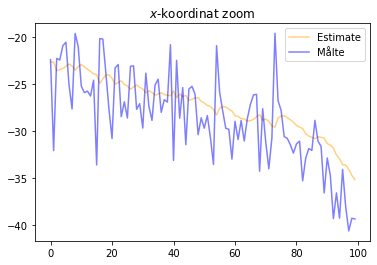

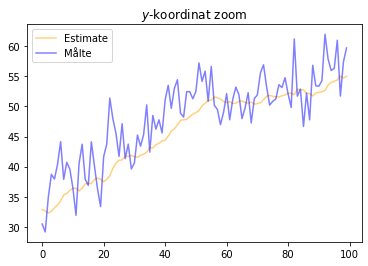

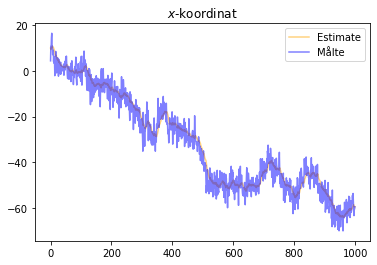

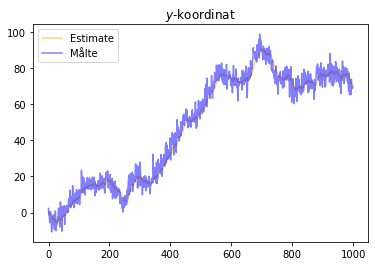

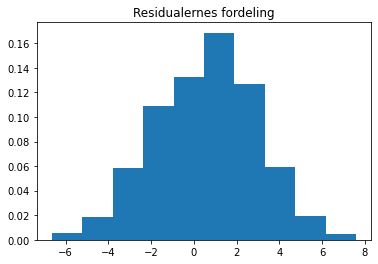

In [3]:
plt.plot(xs_est_arr[400:500, 0, 0], label="Estimate", c="orange", alpha=.5)
plt.plot(ys_arr[400:500, 0, 0], label="Målte", c='b', alpha=.5)
plt.legend()
plt.title(r"$x$-koordinat zoom")
plt.show()

plt.plot(xs_est_arr[400:500, 1, 0], label="Estimate", c="orange", alpha=.5)
plt.plot(ys_arr[400:500, 1, 0], label="Målte", c='b', alpha=.5)
plt.legend()
plt.title(r"$y$-koordinat zoom")
plt.show()

plt.plot(xs_est_arr[:, 0, 0], label="Estimate", c="orange", alpha=.5)
plt.plot(ys_arr[:, 0, 0], label="Målte", c='b', alpha=.5)
plt.legend()
plt.title(r"$x$-koordinat")
plt.show()

plt.plot(xs_est_arr[:, 1, 0], label="Estimate", c="orange", alpha=.5)
plt.plot(ys_arr[:, 1, 0], label="Målte", c='b', alpha=.5)
plt.legend()
plt.title(r"$y$-koordinat")
plt.show()

plt.hist(res[:, 0, 0], density=True)
plt.title("Residualernes fordeling")
plt.show()